# Assignment: Linear Regression
In this assignment you will implement Linear Regression for a very simple test case. Please fill into the marked places of the code
  
  (1) the cost function
  (2) the update function for Gradient Descent

Things that need to be updated are marked with "HERE YOU ..."

This assignment is kept very simple on purpose to help you familiarize with Python (Jupyter notebooks) and Linear Regression. Feel free to make some useful tests such as, but not limited to:
- 1) What happens if the learning rate is too low?

- 2) What happens if the learning rate is too high?

- 3) Can Linear Regression really find the absolute global minimum?

- 4) What effect does it have if you change the initial guess for the gradient descent to something completely off?

- 5) What happens if you are not updating thet0 and thet1 "simultaneously" but you are updating both parameters in separate for loops (see below)?

- 6) How many iterations of the gradient descent algorithm do you have to calculate to reach the correct exact values of theta0 and theta1?

## Import the required packages

In [228]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

## Function to calculate the Gradiend descent

In [229]:
def gradientDescent(x, y, theta, alpha, m, maxsteps):
    #list of the 2 theta during the iterations
    thetaHist=np.empty([maxsteps, 2])
    #we do i number of iterations (i = maxsteps)
    for i in range(0, maxsteps):
        J=0
        #compute the derivate of the cost function
        for j in range(m):
            h = theta[0]+ theta[1]*x[j,1]
            J = J + (h-y[j])*x[j]
        cost = (1/m)*J
        #update the 2 thetas parameters
        theta = theta - alpha*cost
        #store the new thetas in the list
        thetaHist[i] = theta
   
    return theta, thetaHist

In [230]:
def gradientDescentExperiment5(x, y, theta, alpha, m, maxsteps):
    #list of the 2 theta during the iterations
    thetaHist=np.empty([maxsteps, 2])
    #we do i number of iterations (i = maxsteps) only first for the first theta parameters
    for i in range(0, maxsteps):
        J=0
        for j in range(m):
            h = theta[0]+ theta[1]*x[j,1]
            J = J + (h-y[j])*x[j]
        cost = (1/m)*J
        
        #only update the first theta parameter
        theta[0] = theta[0] - alpha*cost[0]
        #store it to the list
        thetaHist[i,0] = theta[0]
    
    #we do i number of iterations (i = maxsteps) only first for the first theta parameters
    for i in range(0, maxsteps):
        J=0
        for j in range(m):
            h = theta[0]+ theta[1]*x[j,1]
            J = J + (h-y[j])*x[j]
        cost = (1/m)*J
        #only update the second theta parameter
        theta[1] = theta[1] - alpha*cost[1]
        #store it to the list
        thetaHist[i,1] = theta[1]
   
    return theta, thetaHist

In [247]:
def gradientDescentExperiment6(x, y, theta, alpha, m, error):
    thetaHist=np.empty([maxsteps, 2])
    xTrans = x.transpose()
    stepSize = 1
    counter = 0
    array = np.polyfit(x[:,1],y,1)
    #loop until the stepsize is smaller than the chosen error size
    while(stepSize > error):
        #matricial product of x and theta
        prediction = x.dot(theta)

        #update the stepsize of both thetas
        stepSize0 = (prediction - y)*x[:,0]
        stepSize1 = (prediction - y)*x[:,1]

        #update both thetas 
        theta[0] = theta[0] -((alpha/m)*(stepSize0.sum()))
        theta[1] = theta[1] -((alpha/m)*(stepSize1.sum()))

        #stote the thetas
        thetaHist[i] = theta

        #update the stepsize
        stepSize = (theta[0] - array[1]) + (theta[1] - array[0])
        #nbr of iteration+1
        counter = counter + 1

    return theta, thetaHist, counter

## Function to calcultate the cost function

In [232]:
def costFunction(x, y, theta):
    m = len(x)#nbr of instances
    J=0
    #loop through instances and for each, compute the sum as follow
    for i in range(m):
        h = theta[0]+ theta[1]*x[i]
        J = J + (h-y[i])**2
    #compute the cost function
    cost = (1/(2*m))*J
    return cost

## Define some training data
To test your algorithm it is a good idea to start with very simple test data where you know the right answer. So let's put all data points on a line first. Feel free to play this test data.

In [233]:
x=np.array([[1, 0], [1, 0.5], [1, 1], [1, 1.5], [1, 2], [1, 2.5], [1, 3], [1, 4], [1, 5]])
y=np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])

## Calculate length of training set


In [234]:
m, n = np.shape(x)

## Plot training set


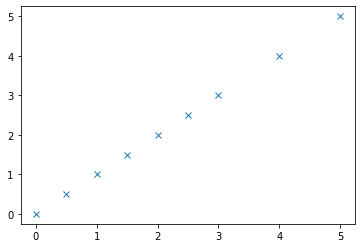

In [235]:
fig = plt.figure(1)  # An empty figure with no axes
plt.plot(x[:,1], y, 'x')

## Cost function
Also it is useful for simple test cases to not just run an optimization but first to do a systematic search. So let us first calculate the values of the cost function for different parameters theta


In [236]:
theta0 = np.arange(-2, 2.01, 0.25)
theta1 = np.arange(-2, 3.01, 0.25)

# Calculate values of the cost function
J = np.zeros((len(theta0),len(theta1)))
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):
        #for each theta of the list, compute the cost function and add the resluts to the J list
        theta = (theta0[i],theta1[j])
        J[i,j] = costFunction(x[:,1],y,theta)

## Visualize the cost function
Let us do some test plots to see the cost function J and to analyze how it depends on the parameters theta0 and theta1


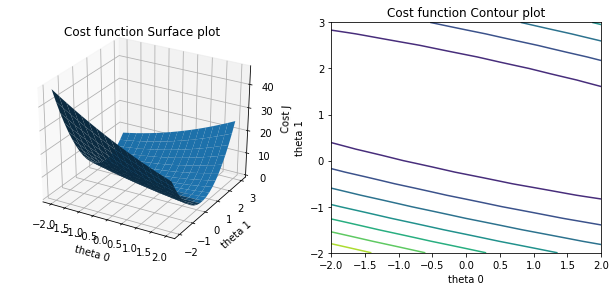

In [237]:
theta0, theta1 = np.meshgrid(theta0, theta1)
fig2 = plt.figure(2)
ax = fig2.add_subplot(121, projection="3d")
surf = ax.plot_surface(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost J')
ax.set_title('Cost function Surface plot')

ax = fig2.add_subplot(122)
contour = ax.contour(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_title('Cost function Contour plot')

fig2.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

## Gradient descent implementation
Here we implement Gradient Descent


In [238]:
alpha = 0.05    # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]
thet1, thetaHist1 = gradientDescent(x, y, thet, alpha, m, maxsteps)

## Print found optimal values



In [239]:
print("Optimized Theta0 is ", thet1[0])
print("Optimized Theta1 is ", thet1[1])

Optimized Theta0 is  3.985292837903096e-07
Optimized Theta1 is  0.9999998725702243


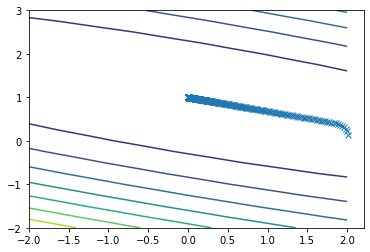

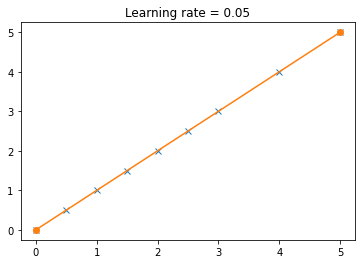

In [240]:
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist1[:,0], thetaHist1[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet1[1] * xs[0] + thet1[0]], [thet1[1] * xs[1] + thet1[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.title("Learning rate = 0.05")
plt.show()

## Visualization of the solution
Now let's plot the found solutions of the Gradient Descent algorithms on the contour plot of our cost function to see how it approaches the desired minimum.


#  EXPERIMENT 1&2: Learning rate too low and too high
If it is too small, it will take more time to reach the minima due to the high number of iterations and also may not find it if the max number of steps is not high enough.
The closer we are to the minima, the higher the error will be.

If it is too high, the gradient may not reach or overshoot the minima and also may diverge due to the fact that the steps are too big

In the following experiments I show that in both cases, the global minima is not found.

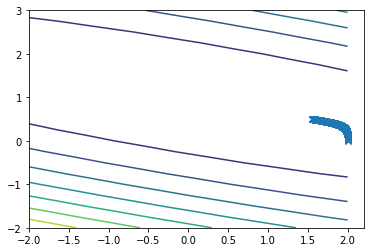

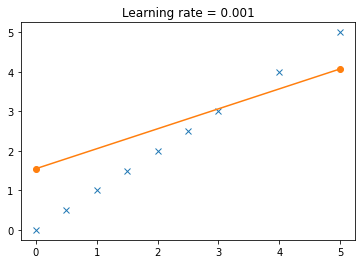

In [241]:
#smaller alpha ratio
alpha2 = 0.001
thet2, thetaHist2 = gradientDescent(x, y, thet, alpha2, m, maxsteps)

##########################################
#Plotting of the graph with learning rate = 0.001 (too low rate)
##########################################

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist2[:,0], thetaHist2[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet2[1] * xs[0] + thet2[0]], [thet2[1] * xs[1] + thet2[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.title('Learning rate = 0.001')
plt.show()

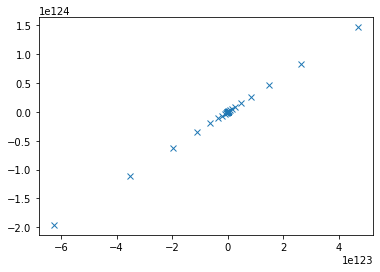

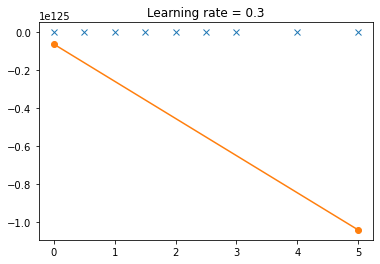

In [242]:
#bigger alpha ratio
alpha3 = 0.3  
thet3, thetaHist3 = gradientDescent(x, y, thet, alpha3, m, maxsteps)
##########################################
#Plotting of the graph with learning rate = 0.3 (too high rate)
##########################################

fig4 = plt.figure(4)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist3[:,0], thetaHist3[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet3[1] * xs[0] + thet3[0]], [thet3[1] * xs[1] + thet3[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.title('Learning rate = 0.3')
plt.show()

# EXPERIMENT 3: Can Linear Regression really find the absolute global minimum?
No, it depends on the starting points and the error length (alpha). In fact, the linear regression may find a minima but not the global one if the error length (alpha) is too small. In the opposite, if it's too high, it may also not find any it. But, with luck and the "perfect" equilibrium between alpha and the max nbr of steps, we may find the global minima.

In the following experiment, I show that the theta0 and theta1 are not exaclty the "perfect" line compared to the exact line parameters going through every point (thanks to the method np.polyfit).

In [243]:
alpha = 0.05        # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

array = np.polyfit(x[:,1],y,2)
print("Real Theta0 is ", array[1])
print("Real Theta1 is ", array[0])

Optimized Theta0 is  3.985292837903096e-07
Optimized Theta1 is  0.9999998725702243
Real Theta0 is  0.9999999999999994
Real Theta1 is  1.311945721213258e-16


# EXPERIMENT 4: Change the initial guess for thet0 and thet1 for the gradient descent
After several experiments on the theta starting points, I concluded that since the cost function is not complex, the gradient algorithm will always find the global minima of the theta parameters.
Nevertheless, here, with initial guess for theta0 and theta1 respectivvely equal to 1M and -1M, we can clearly see that the minima steps aside of the global minima since the line doesn't exaclty go through every point.  
If the function was complex, computing the gradient descent algo on it could output a local minima but not a global one (depending on the alpha and max step parameters)

In the following experiment, I show that changing the initial guess for thet0 and thet1 for the gradient descent with a high number (because our cost function is not complex) makes the gradient algo not finding the global minima.
A fix would be to increase the max nbr of steps so that the algo can keep iterate through the cost function and find the minia.

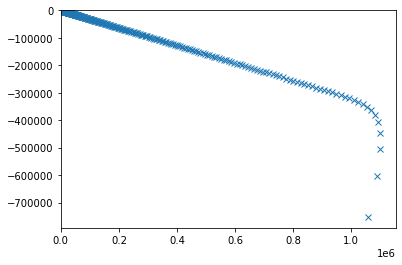

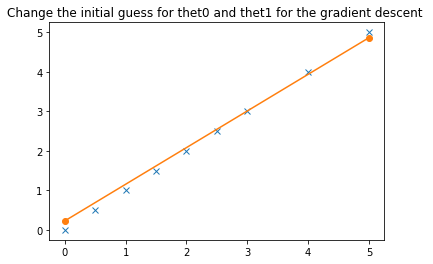

In [244]:
#changing the initial thetas
thet = [1000000,-1000000]
thet5, thetaHist5 = gradientDescent(x, y, thet, alpha, m, maxsteps)
##########################################
#Plotting of the graph with changing the initial guess for thet0 and thet1 for the gradient descent
##########################################

fig6 = plt.figure(6)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist5[:,0], thetaHist5[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet5[1] * xs[0] + thet5[0]], [thet5[1] * xs[1] + thet5[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.title('Change the initial guess for thet0 and thet1 for the gradient descent ')
plt.show()

#  EXPERIMENT 5: Not updating thet0 and thet1 “simultaneously”
If we optimize one parameter. Let's say we optimize theta0. The theta0 is optimized, but it has an influence on the cost of the second parameter, so we won't optimize the second parameter correctly because we will calculate the cost function assuming that we are at a position that is wrong because theta0 is modified.

In the following experiment, I show that not updating thet0 and thet1 “simultaneously” makes the cost function 

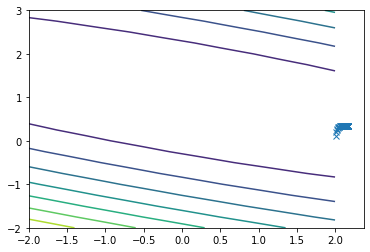

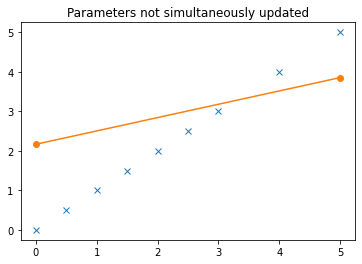

In [245]:
#test the gradient descent without updating thet0 and thet1 “simultaneously”
thet = [2,0]
thet4, thetaHist4 = gradientDescentExperiment5(x, y, thet, alpha, m, maxsteps)
##########################################
#Plotting of the graph with parameters not simultaneoulsy updated
##########################################

fig5 = plt.figure(5)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist4[:,0], thetaHist4[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet4[1] * xs[0] + thet4[0]], [thet4[1] * xs[1] + thet4[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.title('Parameters not simultaneously updated')
plt.show()

# EXPERIMENT 6: How many iterations of the gradient descent algorithm do you have to calculate to reach the correct exact values of theta0 and theta1?
In the following experiment, I tried to find the exact (depending on the step size) nbr of iterations needed to reach the perfect lin (global minima), and with an alpha = 0.05, I concluded that the perfect nbr of iterations should be equal to 1511.

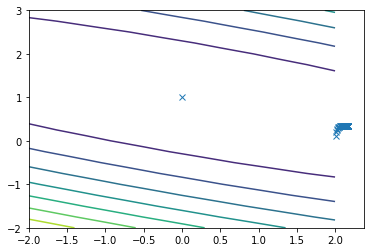

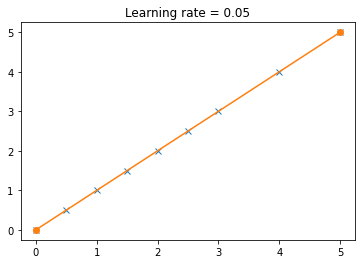

Number of steps needed:  1511


In [248]:
#test the gradient descent to find the exact nbr of steps
thet = [2, 0]
error = 1.0e-10
thet6, thetaHist6, counter = gradientDescentExperiment6(x, y, thet, alpha, m,error)

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist6[:,0], thetaHist6[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet6[1] * xs[0] + thet6[0]], [thet6[1] * xs[1] + thet6[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.title("Learning rate = 0.05")
plt.show()
print('Number of steps needed: ', counter)